# 2nd/3rd Principal Component Analyses and 3D Scatterplot (heart)

Here we will again explore the DrugMatrix data using dimensionality reduction and cluster analysis. However, because the first two principal components did not yield noticeable clusters on a 2 dimensional space, we will now use the 2nd and 3rd components as well as 3 dimensional plotting of the top 3 components in hopes to see visible variation among the data. 

### Principal Component Analysis

PCA reduces dimensionality by finding principal components. These are directions  of maximum variation in a dataset. This will allow us to reduce a dataset's original features to a set of new ones based on the principal components. In this way, we end up with the least amount of features that keep the maximum amount of variation about how the data is distributed.

## Preparing data 

Here we import the DrugMatrix (heart) CSV file of drugs and genes from the google drive folder as a dataframe entitled: 'DM_heart1'

We will use the heart df to create and explore PCA plots (using only the annotated (23,748) genes in DM's database.

In [13]:
import pandas as pd

#Original heart df
DM_heart = pd.read_table('C:\Users\Troy\Desktop\Heart.txt', sep='\t')

#DM_heart2
DM_heart2 = DM_heart.dropna(subset=['Gene'])
del DM_heart2['Unnamed: 0']
del DM_heart2['Unnamed: 209']
DM_heart2.columns.names = ['Drugs']
DM_heart2 = DM_heart2.set_index('Gene')
DM_heart2.head(15) #show top 15 genes

Drugs,TACROLIMUS,AMILORIDE,ACROLEIN,METOPROLOL,PREDNISONE,VALSARTAN,CHLOROBENZENE,CISAPRIDE,VALPROIC ACID,DOXORUBICIN,...,VALSARTAN.3,RISPERIDONE.1,PROCAINAMIDE,ANGIOTENSIN II HUMAN.2,ANGIOTENSIN II HUMAN.3,LORATADINE.1,PAROXETINE.1,CORTISONE,IFOSFAMIDE.1,ANGIOTENSIN II HUMAN.4
Gene,,,,,,,,,,,,,,,,,,,,,
Cyp1a1,-0.444,0.079,-0.230,0.905,-0.236,-0.232,0.741,0.646,0.825,0.196,...,0.259,-0.397,-0.032,-0.514,-0.304,0.296,0.732,-0.303,-0.612,-0.004
Amy2a3,0.325,0.119,-0.007,-0.243,-0.174,-0.241,0.423,-0.054,-0.219,-0.177,...,-0.709,0.390,0.270,0.007,-0.366,-0.363,-0.216,0.254,0.255,0.041
Gtpbp6,0.004,0.003,-0.356,-0.079,-0.015,0.035,-0.067,-0.051,0.051,0.164,...,-0.024,0.071,-0.026,-0.058,0.017,0.114,0.054,0.020,0.006,0.041
Btrc,-0.073,0.105,-0.089,0.025,-0.115,-0.103,0.047,0.044,-0.033,-0.136,...,-0.102,0.094,0.022,-0.047,0.088,-0.049,0.106,-0.072,0.044,0.013
Pde12,-0.056,0.033,0.143,-0.002,-0.008,-0.077,-0.282,-0.059,-0.180,0.352,...,-0.116,0.190,0.105,-0.040,-0.123,0.016,-0.067,0.242,0.027,-0.029
Ppp1r12c,-0.035,-0.091,0.257,-0.015,-0.069,-0.036,0.310,-0.147,-0.003,-0.118,...,-0.350,0.104,0.048,-0.147,0.045,0.070,0.135,-0.097,0.119,0.170
Setd8,0.050,-0.056,-0.022,0.058,-0.064,-0.014,-0.037,0.081,-0.155,-0.004,...,0.108,-0.116,-0.060,0.018,-0.062,0.005,-0.077,-0.052,0.014,-0.003
Zfp593,0.029,0.110,0.310,0.068,-0.200,0.170,0.058,0.038,-0.001,-0.057,...,0.158,0.159,0.403,0.016,-0.077,-0.206,-0.116,-0.169,-0.155,-0.014
Rbm47,0.520,0.017,0.168,0.154,0.258,0.135,0.476,0.154,0.112,0.149,...,0.094,-0.476,0.070,0.362,0.248,0.037,0.101,0.212,0.248,-0.055


In [7]:
print len(DM_heart2.index) -2, "Genes" 
print len(DM_heart2.columns) -1, "Drugs"

23748 Genes
207 Drugs


We specified index_col to be 0 in order to make the drug names the row labels. We used the '\t' separator because our csv is actually tab-delimited (not comma). The head() function shows the first 5 lines (by defalult) to ensure our output is correct.

## Dimensionality Reduction

Ideally at this point we want to represent each drug in a two dimensional space. This dataset has each sample as a drug defined by 41 different variables - each corresponding to a distinct drug (or drug dosage).  

Python's Sci-kit machine learning library comes with PCA implementation

Here we transformed our data into a lower representation and put it into a new dataframe: 'DM_heart2_2d'

We also can check the explained variance ratio as shown below.

In [8]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=3)
pca2.fit(DM_heart2)

DM_2d2 = pca2.transform(DM_heart2)

DM_heart2_2d = pd.DataFrame(DM_2d2)
DM_heart2_2d.index = DM_heart2.index
DM_heart2_2d.columns = ['PC1','PC2','PC3']
DM_heart2_2d.head(10)
#DM_heart2_2d.to_csv('C:\Users\Troy\Desktop\DM_hearttsne.txt')

,PC1,PC2,PC3
Gene,,,
Cyp1a1,2.490833,-1.546235,0.833661
Amy2a3,1.258695,0.626813,2.173206
Gtpbp6,-0.097533,-0.571419,0.510949
Btrc,0.041549,-0.011056,-0.058572
Pde12,-0.059605,0.369462,-0.052850
Ppp1r12c,0.289419,0.520218,-0.018583
Setd8,-0.553858,-0.203320,-0.085269
Zfp593,0.582822,0.482565,0.626955
Rbm47,1.024792,-0.776051,-0.826011


In [9]:
print(pca2.explained_variance_ratio_)

[ 0.08693421  0.04967538  0.03634903]


## Plotting the data (PC1&2)

Here all we have to do is to call plot on the dataframe. We can add annotation loops that tag every point with it's drug name.

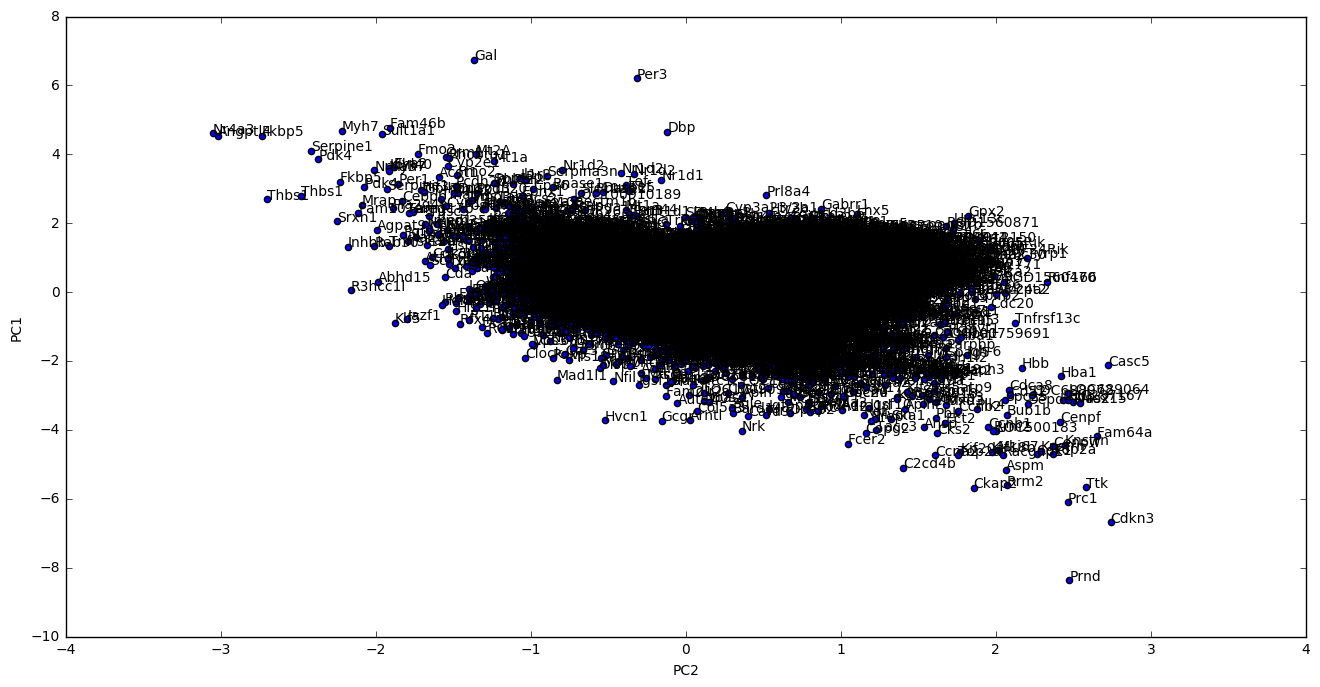

In [10]:
%matplotlib inline

ax = DM_heart2_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, Drug in enumerate(DM_heart2.index):
    ax.annotate(Drug, (DM_heart2_2d.iloc[i].PC2, DM_heart2_2d.iloc[i].PC1))

## Plotting the data (PC2&3)

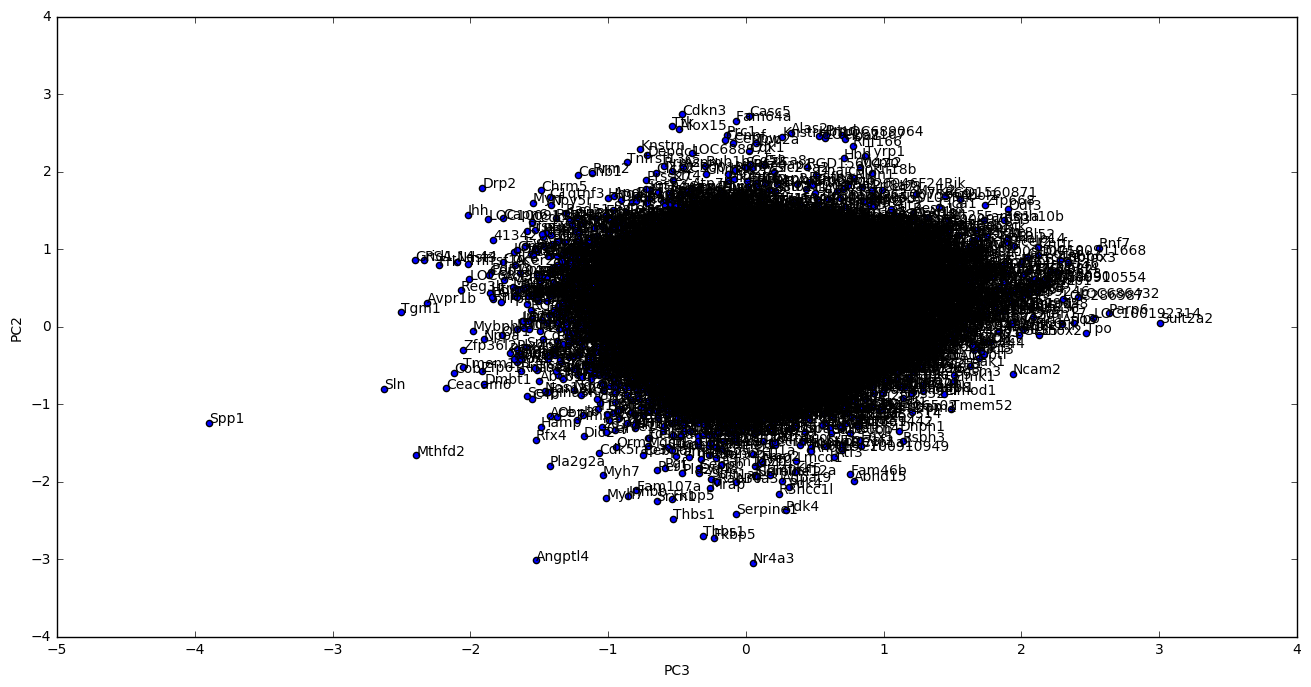

In [11]:
%matplotlib inline

ax = DM_heart2_2d.plot(kind='scatter', x='PC3', y='PC2', figsize=(16,8))

for i, Drug in enumerate(DM_heart2.index):
    ax.annotate(Drug, (DM_heart2_2d.iloc[i].PC3, DM_heart2_2d.iloc[i].PC2))

## Interactive 3D plot (Top 3 PCs)

In [12]:
import plotly.plotly as py
py.sign_in('troypgoff', '2AWnQIHTKdriCuI6TdCp')
fig = py.get_figure("https://plot.ly/~TroyPgoff/24/")
py.iplot(fig)